<a href="https://colab.research.google.com/github/helmypram/Data-Analysis-Regional-Sales/blob/main/US_Regional_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Langkah 2: Membaca semua sheets dari file Excel
file_path = '/content/US_Regional_Sales_Data.xlsx'

In [ ]:
sheets = pd.read_excel(file_path, sheet_name=None)

In [ ]:
print(sheets.keys())


dict_keys(['Sales Orders Sheet', 'Customers Sheet', 'Store Locations Sheet', 'Products Sheet', 'Regions Sheet', 'Sales Team Sheet'])


In [ ]:
sales_orders = sheets['Sales Orders Sheet']
customers = sheets['Customers Sheet']
store_locations = sheets['Store Locations Sheet']
products = sheets['Products Sheet']
regions = sheets['Regions Sheet']
sales_team = sheets['Sales Team Sheet']

In [ ]:
df_combined = sales_orders.merge(customers, on='_CustomerID', how='left')
df_combined = df_combined.merge(store_locations, on='_StoreID', how='left')
df_combined = df_combined.merge(products, on='_ProductID', how='left')
df_combined = df_combined.merge(regions, on='State', how='left')  # Asumsi ada kolom State
df_combined = df_combined.merge(sales_team, on='_SalesTeamID', how='left')

In [ ]:
# List of columns needed
columns_needed = [
'OrderNumber', 'Sales Channel', 'OrderDate', '_SalesTeamID', '_StoreID', '_ProductID', 'Order Quantity', 'Discount Applied', 'Unit Price', 'Unit Cost', '_CustomerID', 'City Name', 'County', 'State', 'Type', 'Latitude', 'Longitude', 'Land Area'
]

In [ ]:
# Memastikan kolom yang diinginkan ada dalam data
available_columns = [col for col in columns_needed if col in df_combined.columns]
df_cleaned = df_combined[available_columns]

In [ ]:
df_cleaned = df_cleaned.dropna()

In [ ]:
import pandas as pd

# Mengonversi kolom OrderDate ke format datetime
df_cleaned['OrderDate'] = pd.to_datetime(df_cleaned['OrderDate'], errors='coerce')

# Memfilter data hanya untuk tahun 2019 dan 2020
df_cleaned = df_cleaned[(df_cleaned['OrderDate'].dt.year >= 2019) & (df_cleaned['OrderDate'].dt.year <= 2020)]

# Hasilkan data bersih dengan kolom yang diinginkan
df_cleaned = df_cleaned.dropna()

# Tampilkan hasil
print(df_cleaned.head())


       OrderNumber Sales Channel  OrderDate  _SalesTeamID  _StoreID  \
1836  SO - 0001937        Online 2019-01-01            16       136   
1837  SO - 0001938      In-Store 2019-01-01             5       282   
1838  SO - 0001939      In-Store 2019-01-01             2       353   
1839  SO - 0001940        Online 2019-01-01            16       238   
1840  SO - 0001941     Wholesale 2019-01-01            28       175   

      _ProductID  Order Quantity  Discount Applied  Unit Price  Unit Cost  \
1836           7               7             0.050      1031.8    773.850   
1837          44               8             0.075      1172.5    644.875   
1838          39               4             0.075      2010.0    924.600   
1839          45               8             0.075      5279.6   4118.088   
1840           6               7             0.150      1038.5    581.560   

      _CustomerID              City Name             County         State  \
1836           27            Tall

In [ ]:
df_cleaned.to_csv('/content/cleaned_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('/content/cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Menyimpan data ke dalam file Excel
output_file_path = '/content/Cleaned_US_Regional_Sales_Data.xlsx'
df_cleaned.to_excel(output_file_path, index=False)

print(f'Data berhasil diekspor ke {output_file_path}')


Data berhasil diekspor ke /content/Cleaned_US_Regional_Sales_Data.xlsx


In [ ]:
# Langkah 7: Analisis Performa Penjualan Berdasarkan Region/Negara Bagian
sales_performance = df_cleaned.groupby(['State', 'Sales Channel']).agg({
    'Order Quantity': 'sum',
}).reset_index()

In [ ]:
# Langkah 8: Analisis Loyalitas Konsumen
customer_loyalty = df_cleaned.groupby('_CustomerID').agg({
    'Order Quantity': 'count',
    'Order Quantity': 'sum'
}).reset_index().rename(columns={'Order Quantity': 'Total Orders'})

In [ ]:
print("Sales Performance by State and Sales Channel:")
print(sales_performance.head())

print("\nCustomer Loyalty Analysis:")
print(customer_loyalty.head())

Sales Performance by State and Sales Channel:
     State Sales Channel  Order Quantity
0  Alabama   Distributor              39
1  Alabama      In-Store             173
2  Alabama        Online              85
3  Alabama     Wholesale              31
4  Arizona   Distributor             106

Customer Loyalty Analysis:
   _CustomerID  Total Orders
0            1           635
1            2           611
2            3           880
3            4           781
4            5           717


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

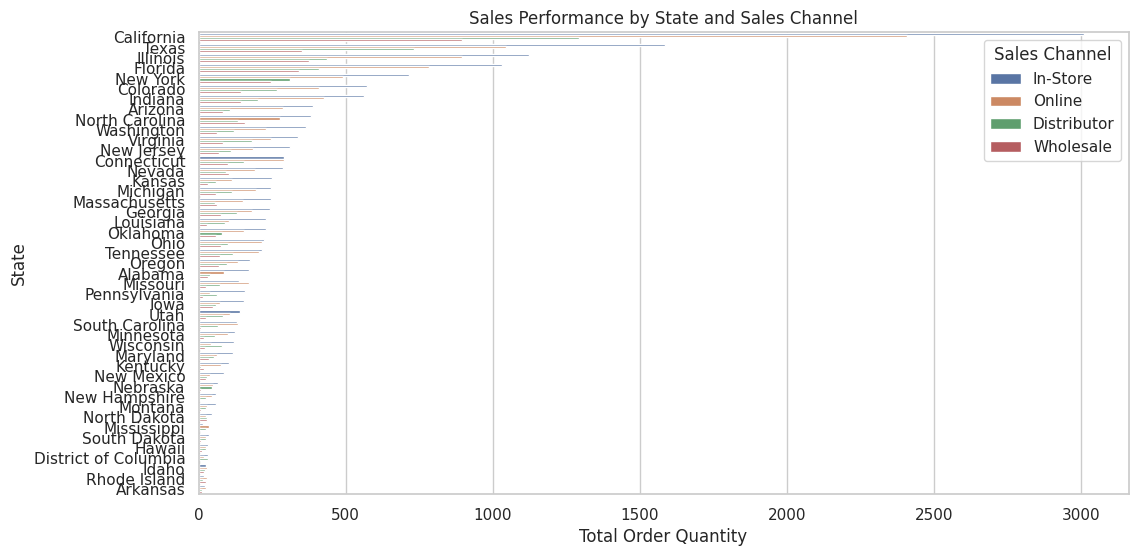

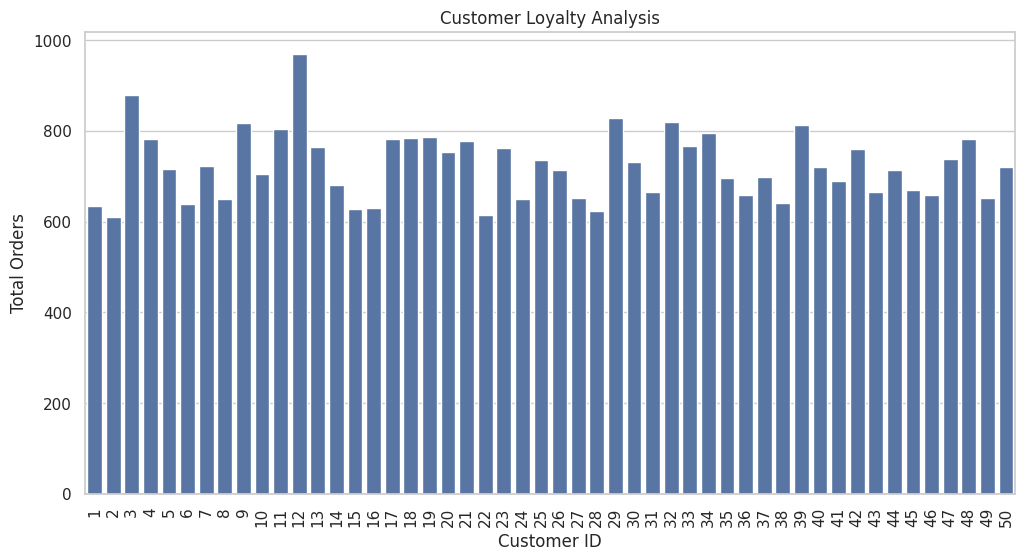

In [ ]:
# Langkah 1: Impor library yang dibutuhkan untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya seaborn
sns.set(style="whitegrid")

# Langkah 2: Visualisasi Performa Penjualan berdasarkan State dan Sales Channel
plt.figure(figsize=(12, 6))
sales_performance_sorted = sales_performance.sort_values(by='Order Quantity', ascending=False)
sns.barplot(data=sales_performance_sorted, x='Order Quantity', y='State', hue='Sales Channel', dodge=True)
plt.title('Sales Performance by State and Sales Channel')
plt.xlabel('Total Order Quantity')
plt.ylabel('State')
plt.legend(title='Sales Channel')
plt.show()

# Langkah 3: Visualisasi Loyalitas Konsumen
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_loyalty, x='_CustomerID', y='Total Orders')
plt.title('Customer Loyalty Analysis')
plt.xlabel('Customer ID')
plt.ylabel('Total Orders')
plt.xticks(rotation=90)  # Memutar label sumbu x untuk keterbacaan
plt.show()


In [ ]:
# Cek nama kolom di df_cleaned
print(df_cleaned.columns)


Index(['City Name', 'County', 'State', 'Type', 'Latitude', 'Longitude',
       'Land Area', 'Sales Channel', 'OrderDate', '_StoreID', 'Order Quantity',
       '_SalesTeamID', '_CustomerID', '_ProductID'],
      dtype='object')
